In [1]:
from kiteconnect import KiteConnect
import urllib.parse
from requests import auth 
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import os, time
from os.path import expanduser
from selenium.webdriver.chrome.options import Options
import pyotp
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import pdb

import sys
import hmac, base64, struct, hashlib, time
import requests


zerodha_cred = {
    'User':{
        'user_id' : 'RK2267',
        'password': "Shan@#2021",
        'api_key' : "pv2830q1vbrhu1eu",   
        'common_ans' : "",
        'api_secret' :'gz426yatawim9xruj2p6e51c40k44r7n',  
        'auth_key': 'TOOAIR75STSUWM67LS3NVUX7B2LGKJ7R'
    },

}
my_api_key=zerodha_cred['User']['api_key']

'''def telegram_bot_sendtext(my_message='SYSTEM RUNNING \n ------------------------- \nNo input received from program'):
    bot_token = '2020880061:AAHDR4kpcb4Y7lsbq59uUpgcqq7hiHYK_AE'  # ParkingBot ID
    bot_chatID = '-746818656'  # TelegramGroup ID 746818656

    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + my_message
    response = requests.get(send_text)
    return response.json()

telegram_bot_sendtext("Starting Zerodha Auth Key fetching")'''


def get_hotp_token(secret, intervals_no):
    key = base64.b32decode(secret, True)
    msg = struct.pack(">Q", intervals_no)
    h = hmac.new(key, msg, hashlib.sha1).digest()
    o = h[19] & 15
    h = (struct.unpack(">I", h[o:o+4])[0] & 0x7fffffff) % 1000000
    return h

def get_totp_token(secret):
    totp = str(get_hotp_token(secret, intervals_no=int(time.time())//30))
    if len(totp) < 6:
        totp = '0' + totp
    return totp


def getkite(_client):

    user_id = zerodha_cred[_client]['user_id']
    password = zerodha_cred[_client]['password']
    api_key = zerodha_cred[_client]['api_key']
    kite = KiteConnect(api_key=api_key)
    # common_ans = zerodha_cred[_client]['common_ans']
    auth_key = zerodha_cred[_client]['auth_key']
    url  = 'https://kite.trade/connect/login?v=3&api_key='+api_key 
    # telegram_bot_sendtext("Line 92")

    try:
        options = Options()
        options.add_argument('--no-sandbox')
        options.add_argument('--headless')
        options.add_argument('--disble-dev-shm-usage')
        driver = webdriver.Chrome(ChromeDriverManager().install())
        driver.get(url)
        time.sleep(2)
        input_fields = driver.find_elements_by_tag_name('input')
        input_fields[0].send_keys(user_id)
        input_fields[1].send_keys(password)
        input_fields[1].send_keys(Keys.ENTER)
        time.sleep(1)
        two_fa = driver.find_elements_by_tag_name('input')
        common_ans = get_totp_token(auth_key)
        two_fa[0].send_keys(str(common_ans))
        two_fa[0].send_keys(Keys.ENTER)
        time.sleep(1)
        while("request_token=" not in driver.current_url):
            print (driver.current_url)
            driver.save_screenshot('login.png')
            time.sleep(3)
        redirect_url = driver.current_url
        #print('redirectURL-',redirect_url)
        parsed = urllib.parse.urlparse(redirect_url)
        query_dict = dict(urllib.parse.parse_qsl(parsed.query))
        request_token = query_dict['request_token']
        driver.close
        return request_token
    except Exception as e:
        print('closing')
        driver.close()
def gen_acc_token():
    global acc_key
    users = ['User'] 
    auth_keys={}
    cur_date=datetime.now().strftime("%y_%m_%d")

    for _client in users:
        api_key = zerodha_cred[_client]['api_key']
        api_secret = zerodha_cred[_client]['api_secret']

        req_token=getkite(_client)  
        # req_token = '8DoJtcPaDkOEj0bxCOm4KC7u4Y3QUd8H'
        url  = 'https://kite.trade/connect/login?v=3&api_key='+api_key 
        print ('url-',url)
        # pdb.set_trace()
        # telegram_bot_sendtext("Line 186")
        # pdb.set_trace()
        kite = KiteConnect(api_key=api_key)
        data = kite.generate_session(req_token, api_secret=api_secret)
        access_token=data["access_token"]
        print(data['user_name'],'has successfully signed in.')
        acc_key=access_token
        print('Access_token->',access_token)
        auth_keys[_client] = access_token

        auth_keys['date'] = cur_date
        telegram_bot_sendtext("*Auth keys extracted!*\n\nUser = \t\t" + _client   +  "\nAuth Key = \t" + auth_keys[_client] +  "\nDate = \t" + auth_keys['date'])

if __name__ == '__main__':
    try:
        gen_acc_token()
        acc_key=""
    except Exception as e:
        print('Happy Trading !')
        #print(my_api_key,acc_key)
        #telegram_bot_sendtext(f" Error in Token Generation - {str(e)}")

    


url- https://kite.trade/connect/login?v=3&api_key=pv2830q1vbrhu1eu
Kakal Krishna Rao has successfully signed in.
Access_token-> vkulcP4NnNzttehyYGwYromoLFmmvg2w
Happy Trading !


In [2]:
!curl "https://api.kite.trade/instruments" -o ins_codes_NSE.csv
!curl "https://api.kite.trade/instruments" -o ins_codes_NFO.csv
print("All data collected")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7838k    0 7838k    0     0  1684k      0 --:--:--  0:00:04 --:--:-- 1763k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7838k    0 7838k    0     0  1943k      0 --:--:--  0:00:04 --:--:-- 1947k
All data collected


In [3]:
icodes=[]
cnames=[]
cnames3=[]
c=0
c1=0
c2=0
c3=0
f1=open('ins_codes_NSE.csv','r')
for line in f1:
    c1=c1+1
    line=line.lstrip()
    line=line.rstrip()
    line=line.split(',')
    if line[7]=="0.05" and line[8]=='1' and line[9]=='EQ':
        icodes.append(int(line[0]))
        line[2]="\""  + str(line[2]) + "\""
        cnames.append(line[2])
        c=c+1
cnames2=[]
icodes2=[]
f1=0
f2=open('ins_codes_NFO.csv','r')
for line in f2:
    c2=c2+1
    line=line.lstrip()
    line=line.rstrip()
    line=line.split(',')
    if line[3] not in cnames2:
        if f1==1:
            c3=c3+1
            icodes2.append(int(line[0]))
            cnames2.append(line[3])
        else:
            f1=1
codes_nse=[]
names_nse=[]


for i in range(len(cnames)):
    if cnames[i] in cnames2:
        codes_nse.append(icodes[i])
        names_nse.append(cnames[i])
        
codes_total=[]
names_total=[]
codes_total.extend(codes_nse)
names_total.extend(names_nse)
dict1 = {codes_total[i]: names_total[i] for i in range(len(codes_total))}
dict2 = {codes_total[i]: i for i in range(len(codes_total))}
dict3 = {i: codes_total[i] for i in range(len(codes_total))}
tokenList = list(dict1.values())
def change(k:dict) -> dict:
    val=list(k.values())
    key=list(k.keys())
    new={}
    s=lambda x: x.replace('"', '')
    for r in zip(key,val):
        res=[*r]
        res[1]=s(res[1])
        new[res[0]]=res[1]
    return new
equity_tokensd=change(dict1)

In [4]:
from datetime import timedelta
import pandas as pd
def history_data(ticker_val):
    data1=['' for i in range(1)]
    curr_date=datetime.now()
    start_date=(curr_date - timedelta(days=365))
    
    url1="https://api.kite.trade/instruments/historical/"+str(ticker_val)+"/day?from="+str(start_date)+"&to="+str(curr_date)
    HEADERS = {"X-Kite-Version": "3", "Authorization":"token pv2830q1vbrhu1eu:"+acc_key}
    res1 = requests.get(url1, headers=HEADERS)
    i=0
    data1[i] = res1.json()
    data1[i] = data1[i]["data"]["candles"]
    data1[i]=pd.DataFrame(data1[i])
    data1[i] = data1[i].rename(columns={0: 'Time', 1: 'Open', 2:'High', 3:'Low', 4:'Close', 5:'Volume'})
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return data1

In [5]:
from tqdm import tqdm
print('Collecting historical data...')

History_5={}
for i,j in tqdm(equity_tokensd.items()):
    df=history_data(i)[0]
    for i in range(len(df)):
        df['Time'].iloc[i]=pd.to_datetime(df['Time'].iloc[i]).date()
    df.set_index('Time',inplace=True)
    History_5[j]=df
print('Historical Data Collected ✅')
    

100%|█████████████████████████████████████████| 581/581 [05:15<00:00,  1.84it/s]

Historical Data Collected ✅


# YEARLY TOP 10 EXPENSIVE STOCKS

In [6]:
import matplotlib.pyplot as plt
closing_df=pd.DataFrame()
for i,j in equity_tokensd.items():
    closing_df[j]=History_5[j]['Close']
closing_df

,AARTIIND,ABB,ABBOTINDIA,ABCAPITAL,ABFRL,ACC,ACCEL,ADANIENT,ADANIPORTS,ALKEM,AMARAJABAT,AMBUJACEM,APOLLOHOSP,APOLLOTYRE,ARCHIES,ARVIND,ASHOKLEY,ASIANPAINT,ASTRAL,ATLANTA,ATUL,AUBANK,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BALKRISIND,BANDHANBNK,BANKBARODA,BATAINDIA,BEARDSELL,BEL,BEML,BERGEPAINT,BHARATFORG,BHARTIARTL,BHEL,BIOCON,BOSCHLTD,BPCL,BPL,BRITANNIA,BSL,BSOFT,CANBK,CANFINHOME,CARYSIL,CESC,CHAMBLFERT,CHOLAFIN,CIPLA,CMI,COALINDIA,COFORGE,COLPAL,CONCOR,COROMANDEL,CREST,CRISIL,CROMPTON,CUB,CUMMINSIND,CUPID,CYIENT,DABUR,DALBHARAT,DCM,DCW,DELHIVERY,DELTACORP,DIVISLAB,DIXON,DLF,DRREDDY,EICHERMOT,EMUDHRA,EPL,ESCORTS,ETT,EXIDEIND,FACT,FDC,FEDERALBNK,FSL,GAIL,GATI,GHCL,GLENMARK,GMRINFRA,GNFC,GODREJCP,GODREJPROP,GRANULES,GRASIM,GSPL,HAL,HAVELLS,HCLTECH,HDFC,HDFCAMC,HDFCBANK,HDFCLIFE,HEG,HEROMOTOCO,HFCL,HIKAL,HIL,HINDALCO,HINDCOPPER,HINDPETRO,HINDUNILVR,HKG,HONAUT,HUBTOWN,IBULHSGFIN,ICDSLTD,ICICIBANK,ICICIGI,ICICIPRULI,ICRA,IDFC,IDFCFIRSTB,IEX,IGL,INDHOTEL,INDIACEM,INDIAMART,INDIGO,INDUSINDBK,INDUSTOWER,INFY,INTELLECT,IOC,IPCALAB,IRCTC,ITC,ITI,IVP,IZMO,JINDALSTEL,JKCEMENT,JSWSTEEL,JUBLFOOD,KAMDHENU,KAYA,KCP,KDDL,KIOCL,KOPRAN,KOTAKBANK,KRBL,KSB,L&TFH,LALPATHLAB,LAURUSLABS,LICHSGFIN,LINC,LT,LTI,LTTS,LUPIN,M&M,M&MFIN,MANAPPURAM,MARICO,MARUTI,MASTEK,MCX,MEGASOFT,METROPOLIS,MFSL,MGL,MINDTREE,MMTC,MOIL,MONIND,MOTHERSON,MPDL,MPHASIS,MRF,MRPL,MSTC,MUTHOOTFIN,NATIONALUM,NAUKRI,NAVA,NAVINFLUOR,NCC,NDTV,NELCAST,NELCO,NESTLEIND,NHPC,NIBE,NILKAMAL,NITCO,NMDC,NOCIL,NTPC,NURECA,NXTDIGITAL,OBEROIRLTY,OFSS,OMAXE,ONGC,ONMOBILE,PAGEIND,PCBL,PEL,PERSISTENT,PETRONET,PFC,PFIZER,PIDILITIND,PIIND,PNB,POKARNA,POLYCAB,POWERGRID,PPAP,PRADHIN,PROZONINTU,PVR,RAIN,RAMCOCEM,RAMINFO,RAYMOND,RBLBANK,RECLTD,REDINGTON,RELIANCE,RITES,RSWM,SAIL,SAKSOFT,SANDESH,SBICARD,SBILIFE,SBIN,SHALBY,SHREECEM,SIEMENS,SIS,SJVN,SKIPPER,SOBHA,SPIC,SPICEJET,SRF,SRTRANSFIN,SUBEX,SUBROS,SUNPHARMA,SUNTV,SUPERHOUSE,SYMPHONY,SYNGENE,TARC,TARMAT,TATACHEM,TATACOMM,TATACONSUM,TATAMOTORS,TATAPOWER,TATASTEEL,TCS,TECHM,THERMAX,TITAN,TORNTPHARM,TORNTPOWER,TRENT,TRF,TRIDENT,TVSMOTOR,UBL,UFLEX,ULTRACEMCO,UPL,VAKRANGEE,VEDL,VOLTAS,WANBURY,WATERBASE,WHIRLPOOL,WIPRO,YOGI,ZEEL,ZOMATO,ZYDUSLIFE,AIRAN,ALANKIT,ARSHIYA,BALRAMCHIN,BSE,CINEVISTA,DEEPAKNTR,GTL,GUJGASLTD,IDEA,IFCI,JOCIL,MAZDA,MCDOWELL-N,PRECOT,SEPC,SHRENIK
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-22,912.45,2099.80,19512.10,100.25,269.55,2373.55,13.11,1675.75,715.00,3283.30,629.50,388.70,5419.50,217.30,16.95,127.35,133.65,3261.25,2228.05,17.88,8360.70,595.60,627.60,686.40,3444.20,1707.35,7058.30,2245.35,296.90,90.85,2064.65,12.75,67.65,1573.45,778.40,740.95,742.10,60.05,357.85,16934.45,395.60,65.40,3581.60,93.10,456.75,211.80,621.85,796.60,83.50,361.05,595.40,895.40,39.40,150.55,5428.25,1477.40,628.15,755.45,127.00,3202.40,445.85,152.15,879.45,217.25,1117.40,606.80,1942.20,97.75,41.85,NaN,275.25,4679.15,5067.55,400.45,4607.60,2548.05,NaN,204.55,1802.75,33.05,169.60,109.00,276.15,91.45,169.45,91.55,154.75,362.15,469.25,37.45,395.85,911.65,2116.20,303.25,1778.30,303.80,1362.35,1377.50,1110.10,2894.85,2510.50,1515.35,688.85,1991.15,2634.60,70.40,497.85,4317.90,442.15,115.55,316.95,2388.55,20.00,39230.50,34.90,204.65,49.45,752.00,1462.35,620.30,3629.85,56.20,47.20,256.50,474.30,201.95,195.45,7520.35,2162.80,1006.90,291.95,1759.40,641.05,83.00,1015.85,886.75,230.90,114.05,121.95,67.95,368.40,3376.85,657.00,748.45,217.95,461.85,129.45,618.95,244.15,229.40,1955.45,241.85,1211.80,78.95,3471.80,471.85,395.40,224.95,1864.50,6829.60,5348.45,871.30,900.85,170.05,178.50,539.50,7864.40,2574.95,1725.80,27.55,3028.90,923.55,940.20,4754.05,38.85,170.20,NaN,152.05,12.95,3247.70,75657.60,44.15,347.30,1545.45,96.10,6071.90,112.00,3287.45,74.60,81.25,74.10,701.90,18995.35,31.35,4

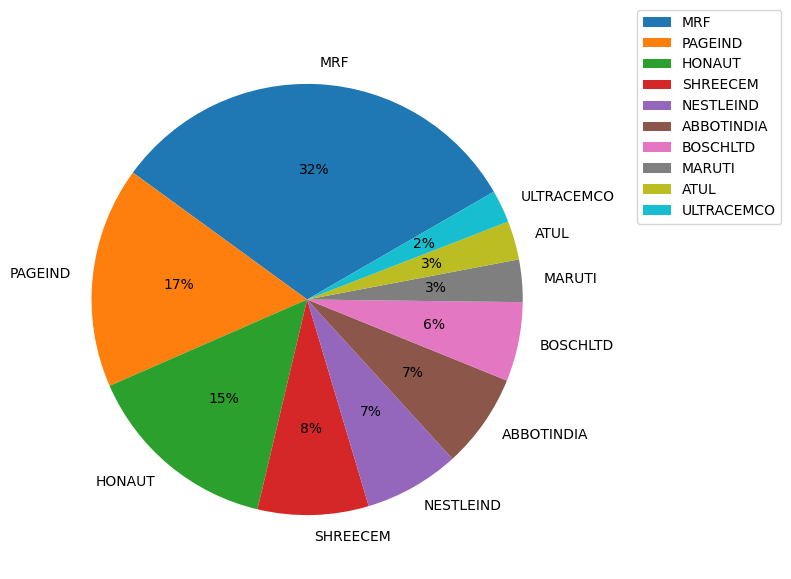

In [14]:
import heapq
last_close=heapq.nlargest(10,closing_df.iloc[-1])
last_ticker=[]
for i in last_close:
    last_ticker.append(list(closing_df.columns)[list(closing_df.iloc[-1]).index(i)])
total=100
plt.figure(figsize=(10,7))
plt.pie(last_close,labels=last_ticker,autopct=lambda p: '{:.0f}%'.format(p * total / 100),startangle=30)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# LAST MONTH TOP 10 INCREASED STOCKS

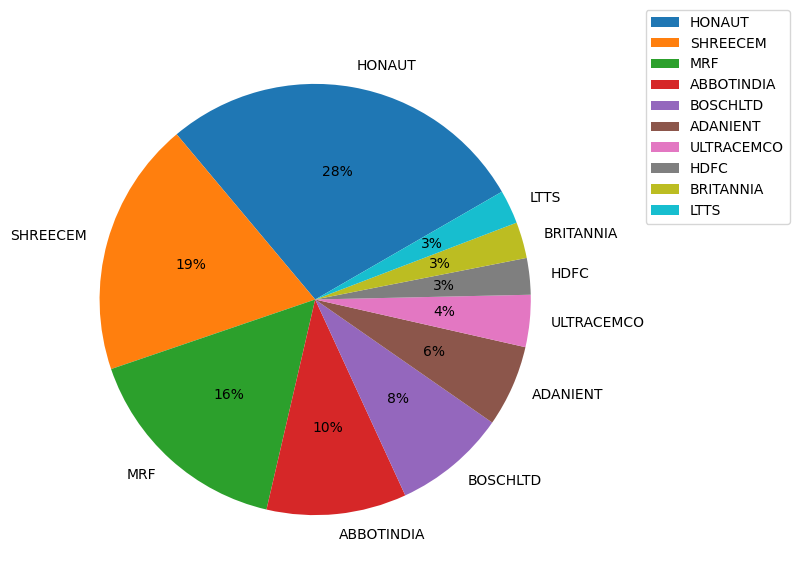

In [9]:
import numpy as np
from datetime import datetime, date
today = date.today()
start_day = today - timedelta(days=30)
last_month=[]
val=0
for col in closing_df.columns:
    val=float(closing_df[col].iloc[-1])-float(closing_df[col].loc[start_day])
    last_month.append(val)
lab=[]
val=[]
val=heapq.nlargest(10,last_month)
for i in val:
    lab.append(list(closing_df.columns)[last_month.index(i)])
total=100
plt.figure(figsize=(20,7))

plt.pie(val,labels=lab,autopct=lambda p: '{:.0f}%'.format(p * total / 100),startangle=30)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# LAST WEEK T0P 10 INCREASED STOCKS

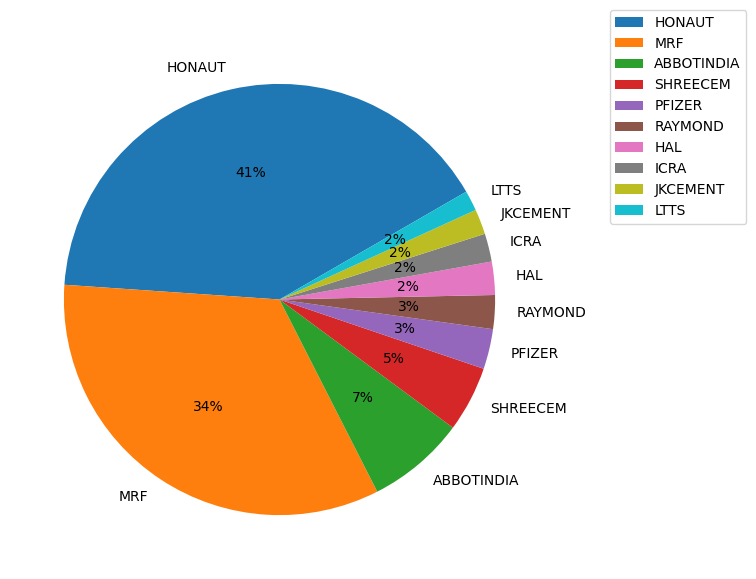

In [10]:
import numpy as np
from datetime import datetime, date
today = date.today()
start_day = today - timedelta(weeks=1,days=2)
last_week=[]
val=0
for col in closing_df.columns:
    val=float(closing_df[col].iloc[-1])-float(closing_df[col].loc[start_day])
    last_week.append(val)
lab=[]
val=[]
val=heapq.nlargest(10,last_week)
for i in val:
    lab.append(list(closing_df.columns)[last_week.index(i)])
total=100
plt.figure(figsize=(20,7))

plt.pie(val,labels=lab,autopct=lambda p: '{:.0f}%'.format(p * total / 100),startangle=30)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# LAST DAY TOP 10 INCREASED STOCKS

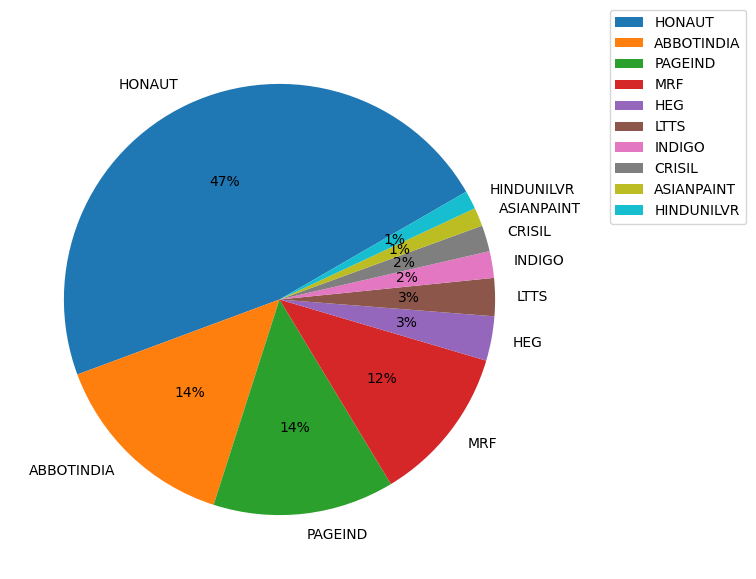

In [12]:
last_day=[]
val=0
for col in closing_df.columns:
    val=float(closing_df[col].iloc[-1])-float(closing_df[col].iloc[-2])
    last_day.append(val)

lab=[]
val=[]
val=heapq.nlargest(10,last_day)
for i in val:
    lab.append(list(closing_df.columns)[last_day.index(i)])
total=100
plt.figure(figsize=(20,7))

plt.pie(val,labels=lab,autopct=lambda p: '{:.0f}%'.format(p * total / 100),startangle=30)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# Returns

# Yearly Top 10 total returns

In [16]:
total_returns_df=pd.DataFrame()
for i,j in equity_tokensd.items():
    total_returns_df[j]=History_5[j]['Close'].pct_change()
total_returns_df.fillna(0,inplace=True)

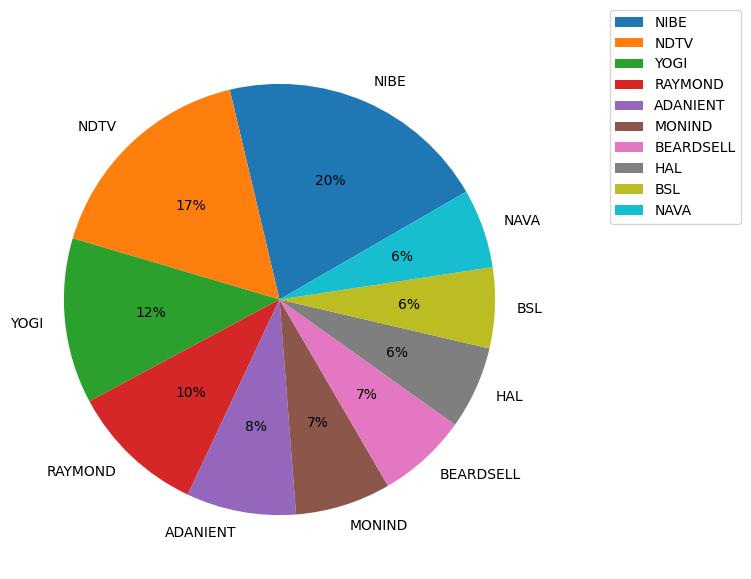

In [22]:
import heapq
returns=[]
for col in total_returns_df.columns:
    val=sum(total_returns_df[col].to_numpy())
    returns.append(val)
lab=[]
top_10_returns=heapq.nlargest(10,returns)
for i in top_10_returns:
    lab.append(list(total_returns_df.columns)[returns.index(i)])
total=100
plt.figure(figsize=(20,7))

plt.pie(top_10_returns,labels=lab,autopct=lambda p: '{:.0f}%'.format(p * total / 100),startangle=30)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()  